In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


## Question 6 & Question 7

Since these two questions are very similar, so I implement all the code we need as a python class (__Rootfinder__), whose methods can do whatever we need.

In [2]:
class RootFinder:
    def __init__(self, a, b, u, v, x_0, y_0):
        self.a = a
        self.b = b

        self.u = u
        self.v = v
        self.x_0 = x_0
        self.y_0 = y_0
    

    def ray(self, t):
        """
        parameters: x_0, y_0, u_0, v_0 defualt (0, 2, 1, -0.3) as is given in the problem
        Input: t
        Output: (x, y) coordinates of the ray
        """


        return self.x_0 + t*self.u, self.y_0 + t*self.v

    def ellipse(self, x, y):
        """
        Input: x, y
        Output: the ellipse function = 0
        """

        return (x/self.a)**2 + (y/self.b)**2 - 1


    def f(self, t):
        """
        Goal: Composite the ellipse and the ray.
        Input: t
        Output: (actualy the error term), which is the objective function

        """
        x, y = self.ray(t)
        return self.ellipse(x, y)


    def fprime(self, t):
        """
        The derivative of the objective function, depending on a, b, u, v
        Input: t
        Output: f'(t) 
        Using chain rule
        """
        x, y = self.ray(t)
        return self.u*(2*x)/(self.a**2) + self.v*(2*y)/(self.b**2)
    
    def newton_iteration(self, t_0, max_iteration=100):
        t = t_0
        t_history = [t]
        error_history = [abs(self.f(t))]
        for i in range(max_iteration):
            t = t - self.f(t)/self.fprime(t)
            error = abs(self.f(t))
            t_history.append(t)
            error_history.append(error)
            if error < 1e-6:
                break
        
        return t_history, error_history

    
    def solve(self, t_0):
        flag = True
        while flag:
            t_history, error_history = self.newton_iteration(t_0)
            if t_history[-1]>1e-4: # Make sure the sol is not trivial
                flag = False
            else:
                t_0 = random.choice(np.linspace(0, self.a, 100)) # Randomly choose a value to start

        
        return t_history[-1], t_history, error_history
    
    def intersection(self):
        # Compute new x and y
        
        new_x, new_y = self.ray(self.solve(t_0=1)[0])

        
        # calculate new u nad v

        normal_vector = np.array([(self.b * new_x)/self.a, (self.a * new_y)/self.b])
        n = normal_vector/np.linalg.norm(normal_vector)

        w = np.array([self.u, self.v])
        w = w/np.linalg.norm(w)

        new_u, new_v = w - 2 * np.dot(w, n)*n

        # Update the argument
        self.x_0 = new_x
        self.y_0 = new_y
        self.u = new_u
        self.v = new_v


        return np.array([new_x, new_y])
    

## Question 6
Use __Rootfinder().solve()__ (which calls __newton_iteration__ internally), we are able to get the solution.

Note that, by excuding the solution $t=0$, we are able to get the nontrivial solution.

Plugging back the value of $t$ we get, we may get the coordinates of the intersection.

In [3]:
model_1 = RootFinder(a=3,b=2, u=1, v=-0.3, x_0=0, y_0=2)
t, _, _ = model_1.solve(t_0=4) # By setting the initial value big, we can avoid it converges to the root t=0
num_iter = len(_) - 1
x, y = model_1.ray(t)
print("The coordinates of the intersection we found is ({:.4f}, {:.4f}).".format(x, y))

The coordinates of the intersection we found is (2.2453, 1.3264).


### Justification of # of iteration to converge

As we are using _Newtown's Method_, we have quadratic order for convergence. Namely, it is doubleing its zeros at every iterations. 

As $$error_0 = |f(t_0)| = |f(4)| = 0.9378$$ 
which is approximatly between $10^{0}$ and $10^{-1}$, and the iteration number $n$ has the relation $1\cdot 2^{n} = 6$, where $6$ is given by the precision $10^{-6}$. Therefore, we have 
$$n = \log_2{6} = 2.58 \approx 3$$

Note that the actual tolerence will be somewhat bigger than 3, as the calculation of iterations only works when the initial value is very close to the root desired.



In [4]:
print("The actual # of iterations is ", num_iter)

The actual # of iterations is  5


### Visualization

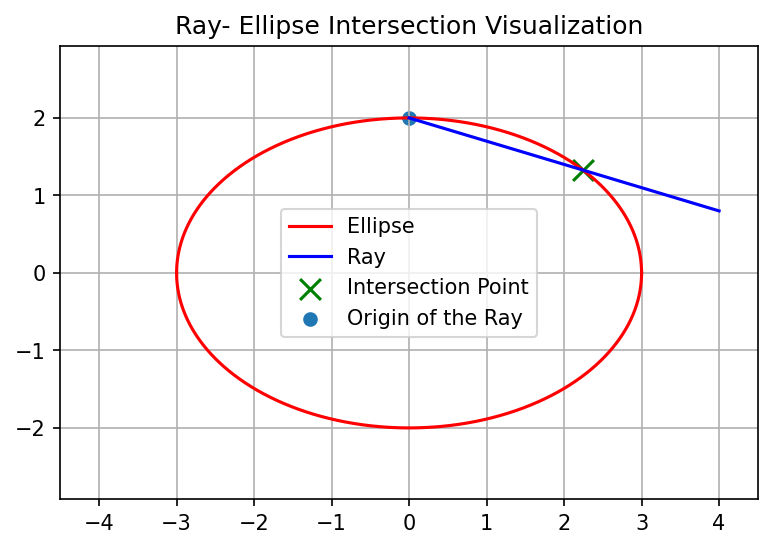

In [5]:
# Visualization

def ellipse_vis(x, a=3, b=2):
    """
    return half of the ellipse
    """
    return b*(1-x**2/a**2)**(1/2)

plt.rcParams['figure.dpi'] = 150

xspace = np.linspace(-3, 3, 10000)
plt.plot(xspace, ellipse_vis(xspace), c=(1,0,0), label="Ellipse")
plt.plot(xspace, -ellipse_vis(xspace), c=(1,0,0))


tspace = np.linspace(0, 4, 200)

ray_x = model_1.x_0 + model_1.u*tspace
ray_y = model_1.y_0 + model_1.v*tspace


plt.plot(ray_x, ray_y, c=(0,0,1), label="Ray", linewidth=1.5)

plt.scatter([x], [y], label="Intersection Point", marker="x", s=100, c="g")
plt.scatter([0], [2], label="Origin of the Ray")



plt.title("Ray- Ellipse Intersection Visualization")

plt.axis("equal")
plt.xlim(-4.5, 4.5)
plt.grid()

plt.legend()


## Question 7
As we have already implemented the __intersection__ method in the class __RootFinder__, we can directly output the result.


The parameters we use is given in Question 6, which are
$$a = 3, b = 2$$
$$u = 1, v = -0.3$$
$$x_0 = 0, y_0 = 2$$

In [6]:
model_2 = RootFinder(a=3,b=2, u=1, v=-0.3, x_0=0, y_0=2)
output = np.zeros((51, 2))
output[0] = np.array([0, 2])
for i in range(1, 51):
    output[i] =  model_2.intersection()

output = output.T

### Visualization

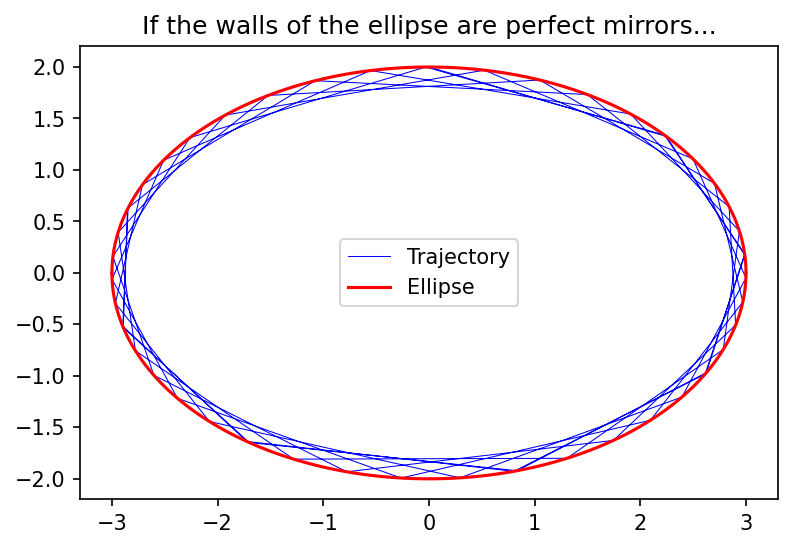

In [7]:
# Visualization

def ellipse_vis(x, a=3, b=2):
    """
    return half of the ellipse
    """
    return b*(1-x**2/a**2)**(1/2)

xspace = np.linspace(-3, 3, 10000)


plt.rcParams['figure.dpi'] = 150 

plt.plot(output[0], output[1], c=(0,0,1), label="Trajectory", linewidth=0.5)

plt.plot(xspace, ellipse_vis(xspace), c=(1,0,0), label="Ellipse")
plt.plot(xspace, -ellipse_vis(xspace), c=(1,0,0))
plt.title("If the walls of the ellipse are perfect mirrors...")
plt.legend()




### $50^{th}$ intersection...



In [8]:
print("The coordinates of the 50th intersection is ({:.4f}, {:.4f}).".format(output[0][-1], output[1][-1]))

The coordinates of the 50th intersection is (-2.8530, 0.6185).
